# Concatenate 

In [1]:
import pandas as pd


In [8]:
users = pd.DataFrame({'user_id':[1,2,3],
                     'name':['radha','krsna','tungvidya']})

In [9]:
users

,user_id,name
0,1,radha
1,2,krsna
2,3,tungvidya


In [10]:
msgs = pd.DataFrame({'user_id':[1,1,2,4],
                    'msg':['hmm','acchha','theek hai','nice']})

In [11]:
msgs

,user_id,msg
0,1,hmm
1,1,acchha
2,2,theek hai
3,4,nice


In [12]:
# So we have these two tables, we need to see msgs along with their names.
# However pd.concat always gives us undesirable results, because it join the dataframes using implicit indices and not any particular columns.
# so we avoid using pd.concat, instead we will always use pd.merge

In [13]:
pd.concat([users,msgs])

# As expected, Not making any sense.
# Let's do it in smart way. by using pd.merge

,user_id,name,msg
0,1,radha,NaN
1,2,krsna,NaN
2,3,tungvidya,NaN
0,1,NaN,hmm
1,1,NaN,acchha
2,2,NaN,theek hai
3,4,NaN,nice



# Merge

In [14]:
pd.merge(users,msgs,on='user_id')

# by default this takes innner join. That's why it is only showing results which are common in both the dfs.

,user_id,name,msg
0,1,radha,hmm
1,1,radha,acchha
2,2,krsna,theek hai


In [15]:
# Here is a simple method of merge. this time we will be taking all the joins one by one

In [16]:
users.merge(msgs,on='user_id',how='left')

,user_id,name,msg
0,1,radha,hmm
1,1,radha,acchha
2,2,krsna,theek hai
3,3,tungvidya,NaN


In [17]:
users.merge(msgs,on='user_id',how='right')

,user_id,name,msg
0,1,radha,hmm
1,1,radha,acchha
2,2,krsna,theek hai
3,4,NaN,nice


In [18]:
users.merge(msgs,on='user_id',how='outer')

,user_id,name,msg
0,1,radha,hmm
1,1,radha,acchha
2,2,krsna,theek hai
3,3,tungvidya,NaN
4,4,NaN,nice


In [19]:
# what if we don't have the same columns name  in both of the tables

In [20]:
# let's change name for user_id in users table

In [21]:
users.rename(columns = {'user_id':'id'},inplace=True)

In [22]:
users

,id,name
0,1,radha
1,2,krsna
2,3,tungvidya


In [23]:
# Now how are we going to merge these two tables.
# Pandas is so flexible and magical. we will see how.

In [24]:
merged = users.merge(msgs,left_on='id',right_on='user_id',how='inner')
merged

,id,name,user_id,msg
0,1,radha,1,hmm
1,1,radha,1,acchha
2,2,krsna,2,theek hai


In [25]:
# But we have to drop atleast one column. because both are repeating. 

merged.drop(columns = 'user_id',inplace=True)

In [26]:
merged

,id,name,msg
0,1,radha,hmm
1,1,radha,acchha
2,2,krsna,theek hai


# Now let's work with larger data sets 

## And we will try to fetch some insights

In [27]:
!gdown 1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd

Downloading...
From: https://drive.google.com/uc?id=1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd
To: C:\Users\htc\movies.csv

  0%|          | 0.00/112k [00:00<?, ?B/s]
100%|##########| 112k/112k [00:00<00:00, 665kB/s]
100%|##########| 112k/112k [00:00<00:00, 665kB/s]


In [28]:
movies = pd.read_csv('C:/Users/htc/movies.csv')

In [29]:
movies

# Two things to notice
# One is we have a unnamed:0 column(it is here because it's part of our real data set.. However we will drop this because we will be using pandas implicit indices only.)
# Second is by default it is taking the first row of the dataset as our Headers.

,Unnamed: 0,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,5,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1460,4736,48363,0,3,321952,The Last Waltz,7.9,64,4809,1978,May,Monday
1461,4743,48370,27000,19,3151130,Clerks,7.4,755,5369,1994,Sep,Tuesday
1462,4748,48375,0,7,0,Rampage,6.0,131,5148,2009,Aug,Friday
1463,4749,48376,0,3,0,Slacker,6.4,77,5535,1990,Jul,Friday


In [30]:
movies.drop(columns = 'Unnamed: 0',inplace  = True)

In [31]:
movies

,id,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,4763,2007,May,Saturday
2,43599,245000000,107,880674609,Spectre,6.3,4466,4764,2015,Oct,Monday
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,4765,2012,Jul,Monday
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,4767,2007,May,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...
1460,48363,0,3,321952,The Last Waltz,7.9,64,4809,1978,May,Monday
1461,48370,27000,19,3151130,Clerks,7.4,755,5369,1994,Sep,Tuesday
1462,48375,0,7,0,Rampage,6.0,131,5148,2009,Aug,Friday
1463,48376,0,3,0,Slacker,6.4,77,5535,1990,Jul,Friday


In [32]:
# Let's import one more dataset (directors)

!gdown 1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm

Downloading...
From: https://drive.google.com/uc?id=1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm
To: C:\Users\htc\directors.csv

  0%|          | 0.00/65.4k [00:00<?, ?B/s]
100%|##########| 65.4k/65.4k [00:00<00:00, 885kB/s]


In [33]:
directors = pd.read_csv('C:/Users/htc/directors.csv')

In [34]:
directors

,Unnamed: 0,director_name,id,gender
0,0,James Cameron,4762,Male
1,1,Gore Verbinski,4763,Male
2,2,Sam Mendes,4764,Male
3,3,Christopher Nolan,4765,Male
4,4,Andrew Stanton,4766,Male
...,...,...,...,...
2344,2344,Shane Carruth,7106,Male
2345,2345,Neill Dela Llana,7107,NaN
2346,2346,Scott Smith,7108,NaN
2347,2347,Daniel Hsia,7109,Male


In [35]:
directors.drop(columns = 'Unnamed: 0',inplace=True)

In [36]:
directors

,director_name,id,gender
0,James Cameron,4762,Male
1,Gore Verbinski,4763,Male
2,Sam Mendes,4764,Male
3,Christopher Nolan,4765,Male
4,Andrew Stanton,4766,Male
...,...,...,...
2344,Shane Carruth,7106,Male
2345,Neill Dela Llana,7107,NaN
2346,Scott Smith,7108,NaN
2347,Daniel Hsia,7109,Male


In [37]:
# Let's merge these two dfs
# we have director id in movies and we have id in directors.
# Remember names are different

In [38]:
# Before merging let's analyse these tables
# then we will see if we will use inner or left or join?

In [39]:
movies.shape

(1465, 11)

In [93]:
directors.shape

(2349, 3)

In [94]:
# We can see clearly analyse that the directors in movies table is not as much as they're in directors table

In [95]:
# let's check if all of the directors in movies table are present in directors table as well.
# ISIN method is so useful here. we will see how this method works?

movies['director_id'].isin(directors['id'])

# There are so many rows How are we going to analyse all of them.
# Here we will use np.all, That will basically tell us if it is true or false

0       True
1       True
2       True
3       True
4       True
        ... 
1460    True
1461    True
1462    True
1463    True
1464    True
Name: director_id, Length: 1465, dtype: bool

In [40]:
import numpy as np

In [41]:
np.all(movies['director_id'].isin(directors['id']))

True

In [98]:
# Now all the doubts are clear. Let's merge them

In [42]:
data = movies.merge(directors,left_on = 'director_id',right_on = 'id')

In [46]:
data

# After merging we could see there were two id columns with same name
# pandas automatically updated their names

,id_x,budget,popularity,revenue,title,vote_average,vote_count,director_id,year,month,day,director_name,id_y,gender,profit_apply
0,43597,237000000,150,2787965087,Avatar,7.2,11800,4762,2009,Dec,Thursday,James Cameron,4762,Male,2550965087
1,43622,200000000,100,1845034188,Titanic,7.5,7562,4762,1997,Nov,Tuesday,James Cameron,4762,Male,1645034188
2,43876,100000000,101,520000000,Terminator 2: Judgment Day,7.7,4185,4762,1991,Jul,Monday,James Cameron,4762,Male,420000000
3,43879,115000000,38,378882411,True Lies,6.8,1116,4762,1994,Jul,Thursday,James Cameron,4762,Male,263882411
4,44184,70000000,24,90000098,The Abyss,7.1,808,4762,1989,Aug,Wednesday,James Cameron,4762,Male,20000098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,46859,0,14,25288872,Enough Said,6.6,348,6204,2013,Sep,Wednesday,Nicole Holofcener,6204,Female,25288872
1461,47023,6500000,11,13368437,Friends with Money,5.1,128,6204,2006,Sep,Thursday,Nicole Holofcener,6204,Female,6868437
1462,47524,3000000,5,0,Please Give,6.0,57,6204,2010,Jan,Friday,Nicole Holofcener,6204,Female,-3000000
1463,47962,0,0,0,Walking and Talking,6.6,7,6204,1996,Jul,Wednesday,Nicole Holofcener,6204,Female,0


In [47]:
data.drop(columns = ['director_id','id_y'],inplace = True)

# we dropped this because we just have to work with directors names

In [48]:
data

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,profit_apply
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male,2550965087
1,43622,200000000,100,1845034188,Titanic,7.5,7562,1997,Nov,Tuesday,James Cameron,Male,1645034188
2,43876,100000000,101,520000000,Terminator 2: Judgment Day,7.7,4185,1991,Jul,Monday,James Cameron,Male,420000000
3,43879,115000000,38,378882411,True Lies,6.8,1116,1994,Jul,Thursday,James Cameron,Male,263882411
4,44184,70000000,24,90000098,The Abyss,7.1,808,1989,Aug,Wednesday,James Cameron,Male,20000098
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,46859,0,14,25288872,Enough Said,6.6,348,2013,Sep,Wednesday,Nicole Holofcener,Female,25288872
1461,47023,6500000,11,13368437,Friends with Money,5.1,128,2006,Sep,Thursday,Nicole Holofcener,Female,6868437
1462,47524,3000000,5,0,Please Give,6.0,57,2010,Jan,Friday,Nicole Holofcener,Female,-3000000
1463,47962,0,0,0,Walking and Talking,6.6,7,1996,Jul,Wednesday,Nicole Holofcener,Female,0


In [49]:
# Now let's fetch  some basic details about our dataframe 

In [50]:
data.info()

# so we have some null values in  our gender column.
# we will deal with this later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_x           1465 non-null   int64  
 1   budget         1465 non-null   int64  
 2   popularity     1465 non-null   int64  
 3   revenue        1465 non-null   int64  
 4   title          1465 non-null   object 
 5   vote_average   1465 non-null   float64
 6   vote_count     1465 non-null   int64  
 7   year           1465 non-null   int64  
 8   month          1465 non-null   object 
 9   day            1465 non-null   object 
 10  director_name  1465 non-null   object 
 11  gender         1341 non-null   object 
 12  profit_apply   1465 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 148.9+ KB


In [51]:
data.describe(include = 'all')

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,profit_apply
count,1465.000000,1.465000e+03,1465.000000,1.465000e+03,1465,1465.000000,1465.000000,1465.000000,1465,1465,1465,1341,1.465000e+03
unique,NaN,NaN,NaN,NaN,1465,NaN,NaN,NaN,12,7,199,2,NaN
top,NaN,NaN,NaN,NaN,Avatar,NaN,NaN,NaN,Dec,Friday,Steven Spielberg,Male,NaN
freq,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,193,654,26,1309,NaN
mean,45225.191126,4.802295e+07,30.855973,1.432539e+08,NaN,6.368191,1146.396587,2002.615017,NaN,NaN,NaN,NaN,9.523098e+07
std,1189.096396,4.935541e+07,34.845214,2.064918e+08,NaN,0.818033,1578.077438,8.680141,NaN,NaN,NaN,NaN,1.751670e+08
min,43597.000000,0.000000e+00,0.000000,0.000000e+00,NaN,3.000000,1.000000,1976.000000,NaN,NaN,NaN,NaN,-1.657101e+08
25%,44236.000000,1.400000e+07,11.000000,1.738013e+07,NaN,5.900000,216.000000,1998.000000,NaN,NaN,NaN,NaN,0.000000e+00
50%,45022.000000,3.300000e+07,23.000000,7.578164e+07,NaN,6.400000,571.000000,2004.000000,NaN,NaN,NaN,NaN,3.797725e+07
75%,45990.000000,6.600000e+07,41.000000,1.792469e+08,NaN,6.900000,1387.000000,2009.000000,NaN,NaN,NaN,NaN,1.268836e+08


In [52]:
# we see we have very big values in revenue and budget columns
# we will convert the values to millions.

data['revenue']= data['revenue']/1000000
data['budget'] = data['budget']/1000000

In [53]:
data['revenue'] = data['revenue'].round(2)

In [54]:
data['budget'] = data['budget'].round(2)

In [55]:
data

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,profit_apply
0,43597,237.00,150,2787.97,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male,2550965087
1,43622,200.00,100,1845.03,Titanic,7.5,7562,1997,Nov,Tuesday,James Cameron,Male,1645034188
2,43876,100.00,101,520.00,Terminator 2: Judgment Day,7.7,4185,1991,Jul,Monday,James Cameron,Male,420000000
3,43879,115.00,38,378.88,True Lies,6.8,1116,1994,Jul,Thursday,James Cameron,Male,263882411
4,44184,70.00,24,90.00,The Abyss,7.1,808,1989,Aug,Wednesday,James Cameron,Male,20000098
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,46859,0.00,14,25.29,Enough Said,6.6,348,2013,Sep,Wednesday,Nicole Holofcener,Female,25288872
1461,47023,6.50,11,13.37,Friends with Money,5.1,128,2006,Sep,Thursday,Nicole Holofcener,Female,6868437
1462,47524,3.00,5,0.00,Please Give,6.0,57,2010,Jan,Friday,Nicole Holofcener,Female,-3000000
1463,47962,0.00,0,0.00,Walking and Talking,6.6,7,1996,Jul,Wednesday,Nicole Holofcener,Female,0


In [56]:
# Now let's get some insights


In [57]:
# Fetch movies whose ratings are greater than 7 and return  only title and directors name columns

data.loc[data['vote_average']>7,['title','director_name']]

,title,director_name
0,Avatar,James Cameron
1,Titanic,James Cameron
2,Terminator 2: Judgment Day,James Cameron
4,The Abyss,James Cameron
5,Aliens,James Cameron
...,...,...
1424,Bowling for Columbine,Michael Moore
1426,Roger & Me,Michael Moore
1433,The Remains of the Day,James Ivory
1438,Maurice,James Ivory


In [58]:
# Fetch high rated movies which released on after yesr 2015

data.loc[(data['vote_average']>7) & (data['year']>=2015)]

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,profit_apply
93,43867,108.0,167,630.16,The Martian,7.6,7268,2015,Sep,Wednesday,Ridley Scott,Male,522161890
166,43641,190.0,102,1506.25,Furious 7,7.3,4176,2015,Apr,Wednesday,James Wan,Male,1316249360
201,44784,40.0,48,165.48,Bridge of Spies,7.2,2583,2015,Oct,Thursday,Steven Spielberg,Male,125478348
361,43724,150.0,434,378.86,Mad Max: Fury Road,7.2,9427,2015,May,Wednesday,George Miller,Male,228858340
465,43773,135.0,100,532.95,The Revenant,7.3,6396,2015,Dec,Friday,Alejandro González Iñárritu,Male,397950503
512,44128,75.0,48,108.15,The Man from U.N.C.L.E.,7.1,2265,2015,Aug,Thursday,Guy Ritchie,Male,33145109
639,45301,28.0,57,133.35,The Big Short,7.3,2607,2015,Dec,Friday,Adam McKay,Male,105346506
649,44281,44.0,68,155.76,The Hateful Eight,7.6,4274,2015,Dec,Friday,Quentin Tarantino,Male,111760117
766,44770,35.0,53,194.56,The Intern,7.1,1881,2015,Sep,Thursday,Nancy Meyers,Female,159564672
818,47181,5.0,22,24.80,Race,7.1,478,2016,Feb,Friday,Stephen Hopkins,Male,19804129


In [59]:
# Fetch all the movies which released either on saturday or friday

data.loc[(data['day']=='Friday') | (data['day']=='Saturday')]

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,profit_apply
5,46000,18.50,67,183.32,Aliens,7.7,3220,1986,Jul,Friday,James Cameron,Male,164816455
6,47036,6.40,74,78.37,The Terminator,7.3,4128,1984,Oct,Friday,James Cameron,Male,71971200
7,43598,300.00,139,961.00,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male,661000000
16,44041,80.00,49,181.00,Road to Perdition,7.3,1077,2002,Jul,Friday,Sam Mendes,Male,101001478
17,44154,72.00,32,96.89,Jarhead,6.6,765,2005,Nov,Friday,Sam Mendes,Male,24889998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,46574,10.00,33,163.88,Saw III,6.1,1071,2006,Oct,Friday,Darren Lynn Bousman,Male,153876815
1457,46827,0.00,5,0.19,Repo! The Genetic Opera,6.7,100,2008,Jul,Friday,Darren Lynn Bousman,Male,188126
1458,47152,4.00,42,152.93,Saw II,6.3,1251,2005,Oct,Friday,Darren Lynn Bousman,Male,148925093
1462,47524,3.00,5,0.00,Please Give,6.0,57,2010,Jan,Friday,Nicole Holofcener,Female,-3000000


In [60]:
# Fetch top 5 popular movies

In [61]:
data.sort_values(by=["popularity"], ascending= False).head(5)

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,profit_apply
23,43692,165.0,724,675.12,Interstellar,8.1,10867,2014,Nov,Wednesday,Christopher Nolan,Male,510120017
361,43724,150.0,434,378.86,Mad Max: Fury Road,7.2,9427,2015,May,Wednesday,George Miller,Male,228858340
11,43796,140.0,271,655.01,Pirates of the Caribbean: The Curse of the Bla...,7.5,6985,2003,Jul,Wednesday,Gore Verbinski,Male,515011224
315,43797,125.0,206,752.10,The Hunger Games: Mockingjay - Part 1,6.6,5584,2014,Nov,Tuesday,Francis Lawrence,Male,627100229
22,43662,185.0,187,1004.56,The Dark Knight,8.2,12002,2008,Jul,Wednesday,Christopher Nolan,Male,819558444


In [62]:
# Fetch all the movies which is directed by christopher nolan

data.loc[data['director_name']=='Christopher Nolan']

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,profit_apply
21,43600,250.0,112,1084.94,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male,834939099
22,43662,185.0,187,1004.56,The Dark Knight,8.2,12002,2008,Jul,Wednesday,Christopher Nolan,Male,819558444
23,43692,165.0,724,675.12,Interstellar,8.1,10867,2014,Nov,Wednesday,Christopher Nolan,Male,510120017
24,43693,160.0,167,825.53,Inception,8.1,13752,2010,Jul,Wednesday,Christopher Nolan,Male,665532764
25,43716,150.0,115,374.22,Batman Begins,7.5,7359,2005,Jun,Friday,Christopher Nolan,Male,224218673
26,44630,46.0,41,113.71,Insomnia,6.8,1148,2002,May,Friday,Christopher Nolan,Male,67714830
27,44793,40.0,74,109.68,The Prestige,8.0,4391,2006,Oct,Thursday,Christopher Nolan,Male,69676311
28,47170,9.0,60,39.72,Memento,8.1,4028,2000,Oct,Wednesday,Christopher Nolan,Male,30723096


# .apply()

In [63]:
# What if we want to encode the male to 1 and female to 0
# we will be using .apply() here because this allows us to apply a function element wise, and we have flexibility of choosing rows & columns

In [64]:
def encode(data):
    if data == 'Male':
        return 1
    else:
        return 0

In [65]:
data['gender']= data['gender'].apply(encode)

In [66]:
data

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,profit_apply
0,43597,237.00,150,2787.97,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,1,2550965087
1,43622,200.00,100,1845.03,Titanic,7.5,7562,1997,Nov,Tuesday,James Cameron,1,1645034188
2,43876,100.00,101,520.00,Terminator 2: Judgment Day,7.7,4185,1991,Jul,Monday,James Cameron,1,420000000
3,43879,115.00,38,378.88,True Lies,6.8,1116,1994,Jul,Thursday,James Cameron,1,263882411
4,44184,70.00,24,90.00,The Abyss,7.1,808,1989,Aug,Wednesday,James Cameron,1,20000098
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,46859,0.00,14,25.29,Enough Said,6.6,348,2013,Sep,Wednesday,Nicole Holofcener,0,25288872
1461,47023,6.50,11,13.37,Friends with Money,5.1,128,2006,Sep,Thursday,Nicole Holofcener,0,6868437
1462,47524,3.00,5,0.00,Please Give,6.0,57,2010,Jan,Friday,Nicole Holofcener,0,-3000000
1463,47962,0.00,0,0.00,Walking and Talking,6.6,7,1996,Jul,Wednesday,Nicole Holofcener,0,0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_x           1465 non-null   int64  
 1   budget         1465 non-null   float64
 2   popularity     1465 non-null   int64  
 3   revenue        1465 non-null   float64
 4   title          1465 non-null   object 
 5   vote_average   1465 non-null   float64
 6   vote_count     1465 non-null   int64  
 7   year           1465 non-null   int64  
 8   month          1465 non-null   object 
 9   day            1465 non-null   object 
 10  director_name  1465 non-null   object 
 11  gender         1465 non-null   int64  
 12  profit_apply   1465 non-null   int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 148.9+ KB


In [68]:
# Let's calculate profit for each movie

In [69]:
data['profit_simple']= data['revenue']-data['budget']

In [70]:
data

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,profit_apply,profit_simple
0,43597,237.00,150,2787.97,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,1,2550965087,2550.97
1,43622,200.00,100,1845.03,Titanic,7.5,7562,1997,Nov,Tuesday,James Cameron,1,1645034188,1645.03
2,43876,100.00,101,520.00,Terminator 2: Judgment Day,7.7,4185,1991,Jul,Monday,James Cameron,1,420000000,420.00
3,43879,115.00,38,378.88,True Lies,6.8,1116,1994,Jul,Thursday,James Cameron,1,263882411,263.88
4,44184,70.00,24,90.00,The Abyss,7.1,808,1989,Aug,Wednesday,James Cameron,1,20000098,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,46859,0.00,14,25.29,Enough Said,6.6,348,2013,Sep,Wednesday,Nicole Holofcener,0,25288872,25.29
1461,47023,6.50,11,13.37,Friends with Money,5.1,128,2006,Sep,Thursday,Nicole Holofcener,0,6868437,6.87
1462,47524,3.00,5,0.00,Please Give,6.0,57,2010,Jan,Friday,Nicole Holofcener,0,-3000000,-3.00
1463,47962,0.00,0,0.00,Walking and Talking,6.6,7,1996,Jul,Wednesday,Nicole Holofcener,0,0,0.00


In [71]:
# Profit using . apply()

In [72]:
def profit_apply(x):
    return x['revenue']- x['budget']

In [73]:
data['profit_apply'] = data[['revenue','budget']].apply(profit_apply,axis=1)

In [74]:
data

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,profit_apply,profit_simple
0,43597,237.00,150,2787.97,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,1,2550.97,2550.97
1,43622,200.00,100,1845.03,Titanic,7.5,7562,1997,Nov,Tuesday,James Cameron,1,1645.03,1645.03
2,43876,100.00,101,520.00,Terminator 2: Judgment Day,7.7,4185,1991,Jul,Monday,James Cameron,1,420.00,420.00
3,43879,115.00,38,378.88,True Lies,6.8,1116,1994,Jul,Thursday,James Cameron,1,263.88,263.88
4,44184,70.00,24,90.00,The Abyss,7.1,808,1989,Aug,Wednesday,James Cameron,1,20.00,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,46859,0.00,14,25.29,Enough Said,6.6,348,2013,Sep,Wednesday,Nicole Holofcener,0,25.29,25.29
1461,47023,6.50,11,13.37,Friends with Money,5.1,128,2006,Sep,Thursday,Nicole Holofcener,0,6.87,6.87
1462,47524,3.00,5,0.00,Please Give,6.0,57,2010,Jan,Friday,Nicole Holofcener,0,-3.00,-3.00
1463,47962,0.00,0,0.00,Walking and Talking,6.6,7,1996,Jul,Wednesday,Nicole Holofcener,0,0.00,0.00


# Assignments

In [2]:
# Given a dataframe consisting of payments data of candidates,

# Complete the function new_avg() that

# 1. Calculates the mean payment rounded off to 2 decimals for each candidate and stores it in a column avg_payment and
 
# 2. returns the data frame after deleting all the columns other than ‘name’, ‘mar_payment’ and ‘avg_payment

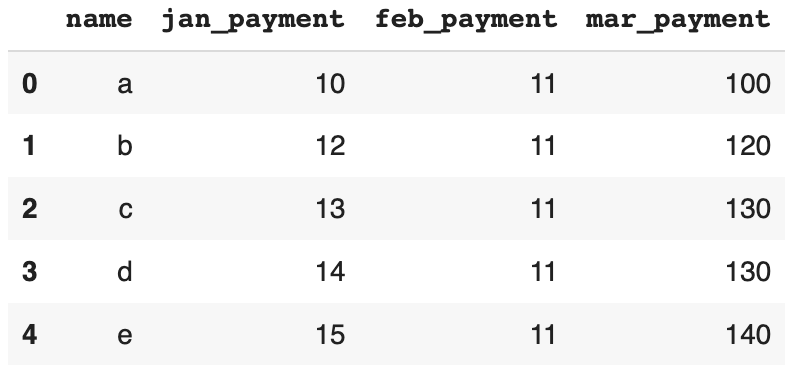


In [ ]:
payment['avg_payment']= payment.loc[['jan_payment','feb_payment','march_payment']].apply(np.mean,axis=1)
# This will get us the avg.
payment.drop(columns=['jan_payment','feb_payment'])

In [1]:
# next

#Problem Statement:

# Given a dataframe containing income details,

# Return the Absolute Difference in median income of male and female.

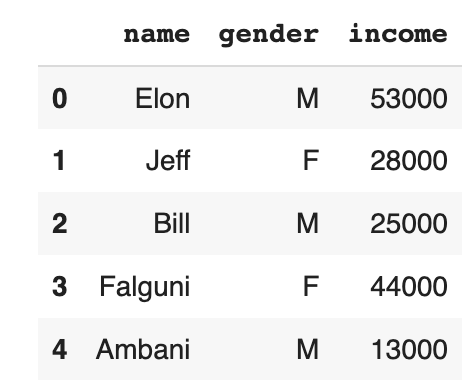


In [17]:
# Solution
import pandas as pd
df= pd.DataFrame({'name':['Elon','Jeff','Bill','Falguni','Ambani'],
                 'gender':['M','F','M','F','M'],
                  'income':[53000,28000,25000,44000,13000]})

median_salary = df.groupby('gender')['income'].median()
Absolute_difference = median_salary['F'] - median_salary['M']
Absolute_difference

11000.0

In [32]:
#next

df1 = pd.DataFrame({'A':[1,2,3,4],
                   'B':[11,22,33,44],
                   'C':[111,222,333,444]})
df2 = pd.DataFrame({'D':['a','b','c','d'],
                   'E':['aa','bb','cc','dd'],
                   'F':['aaa','bbb','ccc','ddd']})

In [33]:
df1.index=['first','second','third','fourth']

df2.index=['fourth','fifth','sixth','seventh']

In [36]:
df3=pd.concat([df1,df2])

In [37]:
df3

,A,B,C,D,E,F
first,1.0,11.0,111.0,NaN,NaN,NaN
second,2.0,22.0,222.0,NaN,NaN,NaN
third,3.0,33.0,333.0,NaN,NaN,NaN
fourth,4.0,44.0,444.0,NaN,NaN,NaN
fourth,NaN,NaN,NaN,a,aa,aaa
fifth,NaN,NaN,NaN,b,bb,bbb
sixth,NaN,NaN,NaN,c,cc,ccc
seventh,NaN,NaN,NaN,d,dd,ddd


In [38]:
#Block a
df4=df3.drop(["fourth"])

In [39]:
df4

,A,B,C,D,E,F
first,1.0,11.0,111.0,NaN,NaN,NaN
second,2.0,22.0,222.0,NaN,NaN,NaN
third,3.0,33.0,333.0,NaN,NaN,NaN
fifth,NaN,NaN,NaN,b,bb,bbb
sixth,NaN,NaN,NaN,c,cc,ccc
seventh,NaN,NaN,NaN,d,dd,ddd


In [48]:
#Block b
df4 = df3.reset_index().drop_duplicates(subset='index', keep='last')          
df4 = df4.set_index('index').sort_index()

In [49]:
df4

,A,B,C,D,E,F
index,,,,,,
fifth,NaN,NaN,NaN,b,bb,bbb
first,1.0,11.0,111.0,NaN,NaN,NaN
fourth,NaN,NaN,NaN,a,aa,aaa
second,2.0,22.0,222.0,NaN,NaN,NaN
seventh,NaN,NaN,NaN,d,dd,ddd
sixth,NaN,NaN,NaN,c,cc,ccc
third,3.0,33.0,333.0,NaN,NaN,NaN


In [47]:
df3.reset_index().drop_duplicates(subset='index',keep='last')

,index,A,B,C,D,E,F
0,first,1.0,11.0,111.0,NaN,NaN,NaN
1,second,2.0,22.0,222.0,NaN,NaN,NaN
2,third,3.0,33.0,333.0,NaN,NaN,NaN
4,fourth,NaN,NaN,NaN,a,aa,aaa
5,fifth,NaN,NaN,NaN,b,bb,bbb
6,sixth,NaN,NaN,NaN,c,cc,ccc
7,seventh,NaN,NaN,NaN,d,dd,ddd


In [50]:
'''
For the above data frame df3, which option is true about the mentioned statements wrt code in blocks a, b, and c?

The statements are:

1. Block a, drops one of the rows with the label fourth, and the output of block c is Nan.

2. Block a, drops all the rows with the label fourth, and the output of block c is a pandas series.

3. Block b, drops all the rows with occurrences of duplicates in the index except the last occurrence of each one.

4. Block b, drops all the rows with occurrences of duplicates in the index except the first occurrence of each one.

'''

# Solution only 2,3 are true/. 1and 4 are False

'\nFor the above data frame df3, which option is true about the mentioned statements wrt code in blocks a, b, and c?\n\nThe statements are:\n\n1. Block a, drops one of the rows with the label fourth, and the output of block c is Nan.\n\n2. Block a, drops all the rows with the label fourth, and the output of block c is a pandas series.\n\n3. Block b, drops all the rows with occurrences of duplicates in the index except the last occurrence of each one.\n\n4. Block b, drops all the rows with occurrences of duplicates in the index except the first occurrence of each one.\n\n'

In [54]:
# next

df2 = pd.DataFrame({"name":['chris', 'pratt', 'andrew', 'tom'],'chem_score':[10, 10, 10, 9],'maths_score':[6, 6, 7, 9],'eng_score':[9, 10, 10, 9]})

df1 = pd.DataFrame({"name": ['tobey', 'peter', 'chris', 'pratt'],'chem_score':[10, 9, 8, 7], 'phy_score':[7, 8, 9, 10], 'Hindi_score':[9, 9, 9, 9]}) 

In [55]:
df1


,name,chem_score,phy_score,Hindi_score
0,tobey,10,7,9
1,peter,9,8,9
2,chris,8,9,9
3,pratt,7,10,9


In [56]:
df2

,name,chem_score,maths_score,eng_score
0,chris,10,6,9
1,pratt,10,6,10
2,andrew,10,7,10
3,tom,9,9,9


In [57]:
# Tests were taken in two sets 1 and 2. Names of the students who participated in the respective tests are given. Marks are recorded according to the subjects, names, and tests. df1 and df2 contain test1 and test2 respectively.

# You are required to return the following:
# 1. Average Chemistry score of students from both the data frames.

# 2. The average score across all the subjects for students who participated in both sets of exams (here all subjects of both the exams have to be considered together)

In [77]:
#1
data = pd.concat([df1,df2])


In [78]:
data

,name,chem_score,phy_score,Hindi_score,maths_score,eng_score
0,tobey,10,7.0,9.0,NaN,NaN
1,peter,9,8.0,9.0,NaN,NaN
2,chris,8,9.0,9.0,NaN,NaN
3,pratt,7,10.0,9.0,NaN,NaN
0,chris,10,NaN,NaN,6.0,9.0
1,pratt,10,NaN,NaN,6.0,10.0
2,andrew,10,NaN,NaN,7.0,10.0
3,tom,9,NaN,NaN,9.0,9.0


In [82]:
data['chem_score'].mean()

9.125

In [87]:
# 2 
data = df1.merge(df2,on='name')

In [90]:
import numpy as np
data

,name,chem_score_x,phy_score,Hindi_score,chem_score_y,maths_score,eng_score
0,chris,8,9,9,10,6,9
1,pratt,7,10,9,10,6,10


In [94]:
data[['chem_score_x','phy_score', 'Hindi_score','chem_score_y','maths_score','eng_score']].apply(np.mean,axis=1)

0    8.500000
1    8.666667
dtype: float64

In [2]:
# next

customers= pd.DataFrame({'cust_id':[101,102,103,104],
                        'name':['rick','morty','pickle','jerry']})

In [3]:
orders = pd.DataFrame({'order_id':['or1','or3','or23','or42'],
                      'cust_id':[102,105,101,102],
                      'amount':[1200,650,120,989]})

In [4]:
customers

,cust_id,name
0,101,rick
1,102,morty
2,103,pickle
3,104,jerry


In [5]:
orders

,order_id,cust_id,amount
0,or1,102,1200
1,or3,105,650
2,or23,101,120
3,or42,102,989


In [6]:
# Problem Statement:

# Given two dataframes customer (containing details of customer) and orders (having details of orders).

# Also, name is given which is a customer’s name.
# Perform the following operation:

# Merge the dataframe such that the resultant dataframe should contain records of all customer ids present in customer dataframe.

# Calculate the total order amount for given customer name

# Return the merged dataframe and the sum amount.

In [7]:
data = customers.merge(orders,on='cust_id',how='outer')

In [10]:
data.loc[data['name']=='morty']['amount'].sum()

2189.0

In [26]:
df1 = pd.DataFrame({'name':['mark','ramilla','deb','laxman'],
                   'profession':['dev','mle','mle','hr'],
                   'gender':['male','female','male','male'],
                   'age':[21,20,30,27],
                   'review':['need improvement','can be improved','scope of improvement','great'],
                   'rating':[10,5,7,9]})

In [27]:
df1

,name,profession,gender,age,review,rating
0,mark,dev,male,21,need improvement,10
1,ramilla,mle,female,20,can be improved,5
2,deb,mle,male,30,scope of improvement,7
3,laxman,hr,male,27,great,9


In [28]:
# Given a data frame as shown below, return the series of male names in the age group of 23-30 (inclusive of both 23 and 30).

#solution

In [31]:
male = df1.loc[(df1['gender']=='male')]

In [34]:
male.loc[(male['age']>=23) & (male['age']<=30)]['name']

2       deb
3    laxman
Name: name, dtype: object

In [48]:
df = pd.DataFrame({'name':['sam','mark','client','sam','tiger','sam'],
                  "employment type": ['fte','fte','intern','fte','freelancer','fte'],
                  'department':['people','marketing','marketing','tech','marketing','tech'],
                  'p_id':[1,2,3,1,4,1]})

In [49]:
df.drop_duplicates(subset = ['name'],keep='last',inplace=True)

In [50]:
df

,name,employment type,department,p_id
1,mark,fte,marketing,2
2,client,intern,marketing,3
4,tiger,freelancer,marketing,4
5,sam,fte,tech,1


In [51]:
df.drop(1,inplace=True)

In [52]:
df

,name,employment type,department,p_id
2,client,intern,marketing,3
4,tiger,freelancer,marketing,4
5,sam,fte,tech,1


In [18]:
# next

# Problem Statement:

# Given two dataframes df1 (containing details of customer) and df2(having details of orders),

# Merge the dataframe such that resultant dataframe contains records for customer ids which are common in both dataframe.

orders = pd.DataFrame({'order_id':['or1','or3','or23','or42'],
                      'cust_id':[102,105,101,102],
                      'amount':[1200,650,120,989]})


customers= pd.DataFrame({'cust_id':[101,102,103,104],
                        'name':['rick','morty','pickle','jerry']})


In [19]:
orders

,order_id,cust_id,amount
0,or1,102,1200
1,or3,105,650
2,or23,101,120
3,or42,102,989


In [22]:
customers

,cust_id,name
0,101,rick
1,102,morty
2,103,pickle
3,104,jerry


In [23]:
customers.merge(orders,on='cust_id',how='inner')

,cust_id,name,order_id,amount
0,101,rick,or23,120
1,102,morty,or1,1200
2,102,morty,or42,989


In [36]:
# next

# Problem Statement:

# Given a dataframe containing employee income information,

# Calculate & return the percentage of employees in medium income bracket.



df1=pd.DataFrame({'name':['bruno','arianna','harry','selena','weeknd'],
                 'gender':['M','F','M','F','M'],
                 'income':['low','high','medium','medium','medium']})

medium_income_count = df1.loc[df1['income']=='medium'].shape[0]
medium_income_count

total_employee_count = df1.shape[0]
total_employee_count

medium_income_percentage = (medium_income_count/total_employee_count)*100
medium_income_percentage

60.0

In [38]:
700000/1723337

0.40618869089446813

In [43]:
# next

df=pd.DataFrame({'area':[1723337,695662,423967,783000],
                'population':[700000,26448193,38332521,19651127]})

In [44]:
df.index=['Alaska','Texas','California','New York']

In [45]:
# Problem Statement:

# Given a dataframe containing area and population data, calculate population density for each state.

# The function should return Series of population density sorted in asc. order.

# Note: Population density is defined as population per unit area.

In [51]:
data = df['population']/df['area']

In [53]:
data.sort_values()

Alaska         0.406189
New York      25.097225
Texas         38.018740
California    90.413926
dtype: float64

In [54]:
# next
# Given a dataframe consisting of records about the population of countries, complete the function population_df() to return a dataframe consisting of records where the population is greater than 10 million and the dataframe should be sorted in ascending order, first by year and then by population columns.

In [55]:
df=pd.DataFrame({'country':['Afghanistan','Australia','Brazil','China','France','India','United States'],
                'year':[1952,1957,1962,1957,1957,1952,1957],
                'population':[8425333.0,9712569.0,76039390.0,637408000.0,44310863.0,372000000.0,171984000.0],
                'continent':['Asia','Oceania','Americas','Asia','Europe','Asia','Americas']})

In [65]:
df.loc[df['population']>10000000.0].sort_values(by=['year','population'],ascending = True)

,country,year,population,continent
5,India,1952,372000000.0,Asia
4,France,1957,44310863.0,Europe
6,United States,1957,171984000.0,Americas
3,China,1957,637408000.0,Asia
2,Brazil,1962,76039390.0,Americas


In [66]:
# next
# return the subset of the data frame with records having a rating >= 6, containing the columns “profession”, “gender” and “age” only.

In [67]:
df = pd.DataFrame({'name':["Sam","Roma","Mark"], "profession":['dev','mle','Data scientist'],"gender":['male','female','male'], "age":[21,20,25],"review":['No comments','hardworker','need improvement'],"rating":[10,5,7]})

In [68]:
df

,name,profession,gender,age,review,rating
0,Sam,dev,male,21,No comments,10
1,Roma,mle,female,20,hardworker,5
2,Mark,Data scientist,male,25,need improvement,7


In [80]:
df.loc[(df['rating']>6)][['profession','gender','age']]

,profession,gender,age
0,dev,male,21
2,Data scientist,male,25


In [86]:
df = pd.DataFrame({'Name':['Himanshu','Robert','Karie','Rohan','John'],
                  'Age':[15,14,15,16,17],
                  'Percentage':[80,77,83,45,70],
                  'Stream':['Commerce','Science','Arts','Commerce','Science']})

In [89]:
df.loc[(df['Percentage']>=75) & ((df['Stream']=='Arts') | (df['Stream']=='Commerce'))]['Name']

0    Himanshu
2       Karie
Name: Name, dtype: object

In [90]:
# next 
# fetch rows between 1 and 3 , 3 exclusive . And return only name and amount column

In [91]:
df = pd.DataFrame({'Date':['2022-01-01','2022-07-01','2022-08-01','2022-03-01','2022-01-01'],'Name':['Himanshu','Robert','Karie','Rohan','John'],
                  'amt':[100,200,400,150,300]})

In [93]:
df.iloc[1:3][['Name','amt']]

,Name,amt
1,Robert,200
2,Karie,400
